In [1]:
from ultralytics import YOLO
from lrp.yolo import YOLOv8LRP
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision

# Load / Preprocess Image

In [2]:
image = Image.open("riksi.jpg")

desired_size = (512, 640)
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(desired_size),
    torchvision.transforms.ToTensor(),
])

image = transform(image).to('cpu').float()

# Model Instantiation

In [3]:
yolo = YOLO('yolov8x.pt')
detection = yolo(image)


WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 512, 640) is incompatible.
0: 512x640 1 person, 2 cats, 1319.7ms
Speed: 0.0ms preprocess, 1319.7ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 640)


In [4]:
# Instantiate a w2-rule relevance propagation object
lrp = YOLOv8LRP(yolo, power=2, eps=1e-05, device='cpu')

# LRP - Relevance Heatmap Explanation

In [5]:
explanation_lrp_person = lrp.explain(image, cls='person', contrastive=False).cpu()
explanation_lrp_cat = lrp.explain(image, cls='cat', contrastive=False).cpu()

tensor(9.4508)
tensor(2.7404)
tensor(2.7404)
tensor(0.2825)
tensor(0.2825)
tensor(1.1464)
tensor(1.1464)
tensor(3.0132)
tensor(3.0132)
tensor(2.6278)
tensor(2.6278)
tensor(1.4631)
tensor(1.4631)
tensor(8.8309)
tensor(10.4092)
tensor(10.4092)
tensor(1.0194)
tensor(1.0194)
tensor(4.9336)
tensor(4.9336)
tensor(3.9565)
tensor(3.9565)
tensor(5.4487)
tensor(5.4487)
tensor(3.0063)
tensor(3.0063)


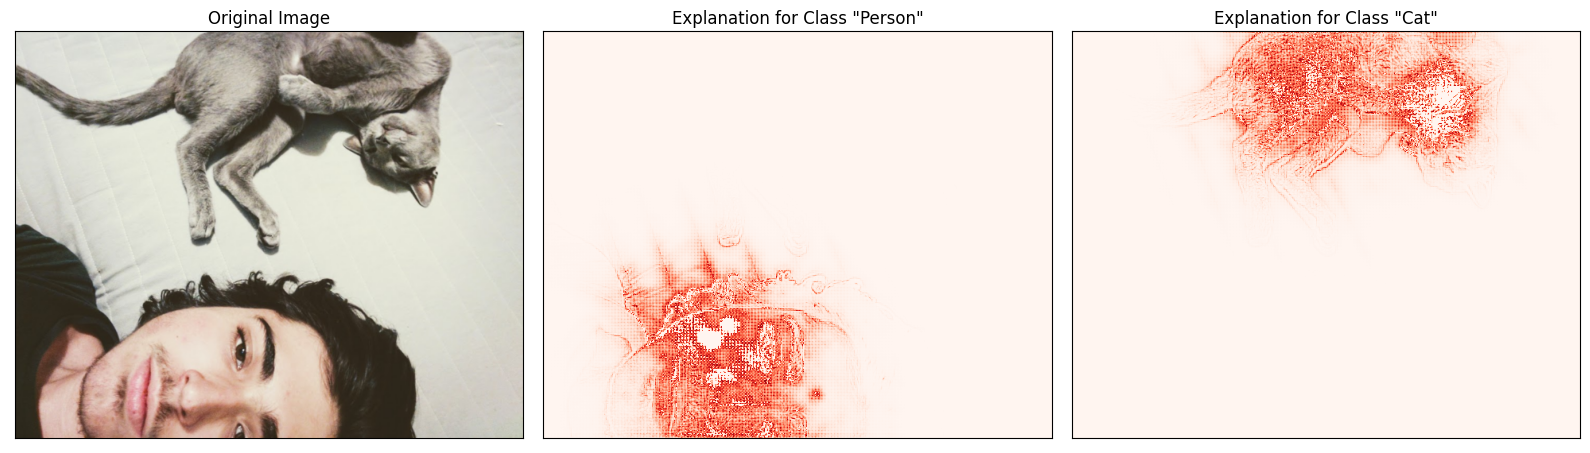

In [6]:

# Plotting the original image
plt.figure(figsize=(16,16))
plt.subplot(1, 3, 1)
plt.imshow(torch.cat([image[c, :, :].cpu().unsqueeze(-1) for c in range(3)], axis=-1))
plt.title('Original Image')
plt.xticks([]); plt.yticks([])

# Plotting the explanation for class 'person crp'
plt.subplot(1, 3, 2)
plt.imshow(explanation_lrp_person, cmap='Reds')
maxrel = np.abs(explanation_lrp_person).max()
plt.clim(vmin=0, vmax=maxrel)
plt.title('Explanation for Class "Person"')
plt.xticks([]); plt.yticks([])

# Plotting the explanation for class 'cat'
plt.subplot(1, 3, 3)
# Assuming 'explanation_cat' is a numpy array for the explanation of class 'cat'
plt.imshow(explanation_lrp_cat, cmap='Reds')
maxrel_cat = np.abs(explanation_lrp_cat).max()
plt.clim(vmin=0, vmax=maxrel_cat)
plt.title('Explanation for Class "Cat"')
plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()


# CRP - Contrastive Relevance Heatmap Explanation

In [7]:
# Generate CRP explanations for both classes
explanation_crp_person = lrp.explain(image, cls='person', contrastive=True,).cpu()
explanation_crp_cat = lrp.explain(image, cls='cat', contrastive=True,).cpu()

tensor(18.5850)
tensor(13.2336)
tensor(13.2336)
tensor(1.3656)
tensor(1.3656)
tensor(6.1340)
tensor(6.1340)
tensor(7.1351)
tensor(7.1351)
tensor(8.2068)
tensor(8.2068)
tensor(4.5651)
tensor(4.5651)
tensor(18.5850)
tensor(13.2336)
tensor(13.2336)
tensor(1.3656)
tensor(1.3656)
tensor(6.1340)
tensor(6.1340)
tensor(7.1351)
tensor(7.1351)
tensor(8.2068)
tensor(8.2068)
tensor(4.5651)
tensor(4.5651)


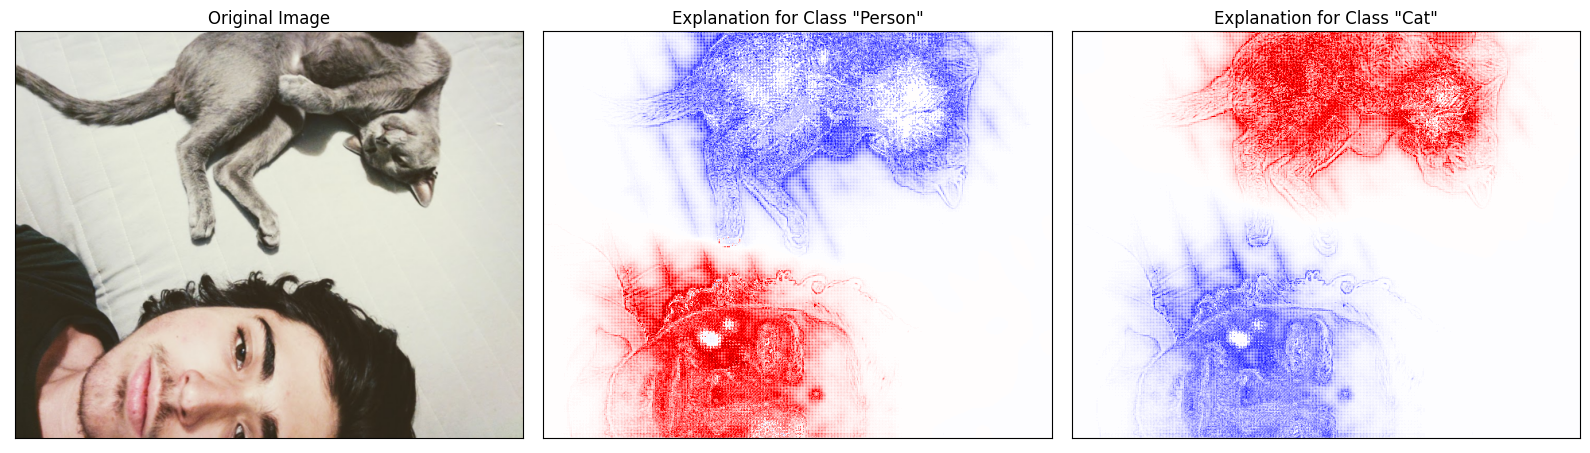

In [8]:
# Plotting the original image
plt.figure(figsize=(16,16))
plt.subplot(1, 3, 1)
plt.imshow(torch.cat([image[c, :, :].cpu().unsqueeze(-1) for c in range(3)], axis=-1))
plt.title('Original Image')
plt.xticks([]); plt.yticks([])

# Plotting the explanation for class 'person crp'
plt.subplot(1, 3, 2)
plt.imshow(explanation_crp_person, cmap='seismic')
maxrel = np.abs(explanation_crp_person).max()
plt.clim(vmin=-maxrel, vmax=maxrel)
plt.title('Explanation for Class "Person"')
plt.xticks([]); plt.yticks([])

# Plotting the explanation for class 'cat'
plt.subplot(1, 3, 3)
# Assuming 'explanation_cat' is a numpy array for the explanation of class 'cat'
plt.imshow(explanation_crp_cat, cmap='seismic')
maxrel_cat = np.abs(explanation_crp_cat).max()
plt.clim(vmin=-maxrel_cat, vmax=maxrel_cat)
plt.title('Explanation for Class "Cat"')
plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()
